<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/Project_1/SCRIPTS/Age_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We looked at the relationship between restaurant age and review sentiment using a linear regression and non-linear regression.

# Importing data and packages

In [ ]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 339 (delta 29), reused 3 (delta 3), pack-reused 230 (from 1)
Receiving objects: 100% (339/339), 2.06 MiB | 5.10 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/DS4002/Project_1/DATA/final_restaurant_df.csv")

In [ ]:
df.head()

,Unnamed: 0,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


# Adding restaurant opening year, age, and age category

In [ ]:
df['Opening'] = df['Restaurant'].apply(lambda x: 1923 if x == "The Virginian"
                                   else (2006 if x == "Ten"
                                         else ( 1995 if x == "Vivace"
                                         else ( 1976 if x == "C&O"
                                         else ( 2003 if x == "Mas Tapas"
                                         else ( 2008 if x == "The Local"
                                         else ( 2009 if x == "Tavalo"
                                         else ( 2014 if x == "Lampo"
                                         else ( 1983 if x == "Duners"
                                         else ( 2011 if x == "Monsoon"
                                         else ( 2021 if x == "ridley"
                                         else ( 2007 if x == "petitpous"
                                         else ( 2015 if x == "Brazos"
                                         else ( 1988 if x == "Guad"
                                         else ( 2014 if x == "Oakhart"
                                         else ( 2014 if x == "publicfish"
                                         else ( 2016 if x == "Black Cow"
                                         else ( 2019 if x == "Belle"
                                         else ( 2002 if x == "Bang"
                                         else ( 2018 if x == "Asado"
                                         else ( 2022 if x == "Smyrna"
                                         else ( 2006 if x == "Doma"
                                         else 2016))))))))))))))))))))))


In [ ]:
df['Age'] = 2025 - df.Opening

In [ ]:
df['Age_Category'] = df['Age'].apply(lambda x: 'Old' if x > 20
                                   else 'New')

# Plot age vs. sentiment

There appears to be no correlation between the two variables.

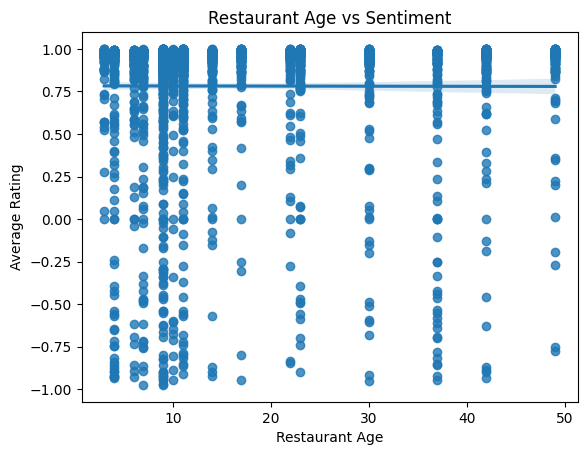

In [ ]:
sns.regplot(x=df['Age'], y=df['sentiment'])
plt.xlabel('Restaurant Age')
plt.ylabel('Average Rating')
plt.title('Restaurant Age vs Sentiment')
plt.show()

# Simple Linear Model

R^2 is 0.000, so we will try another model.

In [ ]:
X = df['Age']
y = df['sentiment']  # or sentiment_score
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01061
Date:                Tue, 11 Feb 2025   Prob (F-statistic):              0.918
Time:                        19:52:34   Log-Likelihood:                -1438.5
No. Observations:                2566   AIC:                             2881.
Df Residuals:                    2564   BIC:                             2893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7826      0.014     57.031      0.0

# Non-Linear Regression

R^2 is 0.000 again, so we did not move forward with this analysis.

In [ ]:
df['age_squared'] = df['Age'] ** 2
X = df[['Age', 'age_squared']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3460
Date:                Tue, 11 Feb 2025   Prob (F-statistic):              0.708
Time:                        19:52:44   Log-Likelihood:                -1438.1
No. Observations:                2566   AIC:                             2882.
Df Residuals:                    2563   BIC:                             2900.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7639      0.026     28.878      